## Import packages

In [1]:
using Pkg
Pkg.activate(".")
Pkg.instantiate()
using RBMAdvanced

  Activating project at `~/Deepest/RBMAdvanced.jl`
    Updating registry at `~/.julia/registries/General.toml`
    Updating `~/Deepest/RBMAdvanced.jl/Project.toml`
  [10745b16] ~ Statistics ⇒ v1.10.0
    Updating `~/Deepest/RBMAdvanced.jl/Manifest.toml`
  [56f22d72] + Artifacts
  [8f399da3] + Libdl
  [37e2e46d] + LinearAlgebra
  [9a3f8284] + Random
  [ea8e919c] + SHA v0.7.0
  [9e88b42a] + Serialization
  [2f01184e] + SparseArrays v1.10.0
  [10745b16] + Statistics v1.10.0
  [e66e0078] + CompilerSupportLibraries_jll v1.1.0+0
  [4536629a] + OpenBLAS_jll v0.3.23+4
  [bea87d4a] + SuiteSparse_jll v7.2.1+1
  [8e850b90] + libblastrampoline_jll v5.8.0+1
Precompiling project...
        Info Given RBMAdvanced was explicitly requested, output will be shown live 
ERROR: Method overwriting is not permitted during Module precompilation. Use `__precompile__(false)` to opt-out of precompilation.
  ? RBMAdvanced
Precompiling RBMAdvanced
        Info Given RBMAdvanced was explicitly requested, output wil

In [2]:
using MLDatasets: MNIST
using Plots


## Training dataset: MNIST 

In [3]:
dataset =  MNIST()

X, y = dataset[:]

# Filter the data for label = 0
indices = findall(y .== 0)
X = X[:, :, indices]
y = y[indices]
X=transpose(Int.(round.(reshape(X[:,], (784, length(y))), digits=0)))
0

0

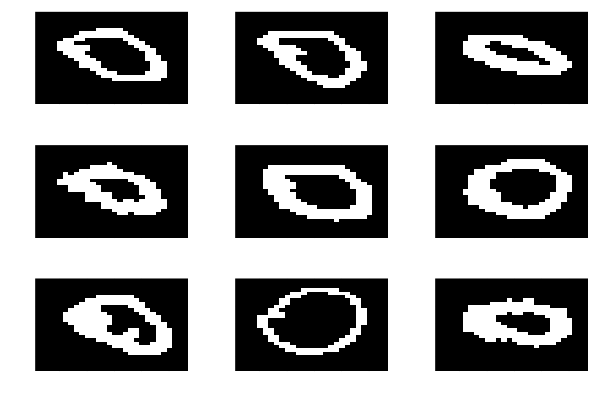

In [4]:
hms = [heatmap(reshape(X[i,:], (28,28)), color = [:black, :white], legend = false) for i in 1:9]
plot(hms..., layout = (3,3), colorbar = false, axis= false)

## Training by CD algorithm

In [5]:
visibleSize = 784
hiddenSize = 300
weight = randInitRBMWeight(visibleSize, hiddenSize)

cdConfig = TrainingConfig(
    usePersistentChain=false,
    betas=[1.0],
    k=5,
    epochs=1000,
    learningRate=0.01
)
validateConfig(cdConfig)
trainRBM!(weight, X[1:30, :], cdConfig)
CDoutput = RBMAdvanced.inferRBM(weight, 1, 9, 100)
0

Using CD


0

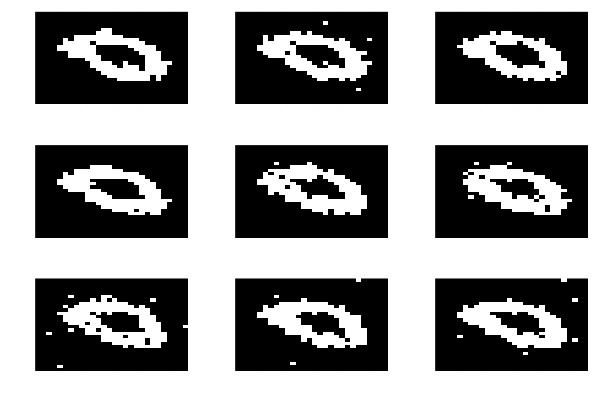

In [6]:
hms = [heatmap(reshape(CDoutput[i], (28,28)), color = [:black, :white], legend = false) for i in 1:9]
plot(hms..., layout = (3,3), colorbar = false, axis= false)

## Training by PCD algorithm


In [7]:
weight = randInitRBMWeight(visibleSize, hiddenSize)
pcdConfig = TrainingConfig(
    usePersistentChain=true,
    betas=[1.0],
    k=1,
    epochs=10000,
    learningRate=0.01
)
validateConfig(pcdConfig)
trainRBM!(weight, X[1:30, :], cdConfig)
PCDoutput = RBMAdvanced.inferRBM(weight, 1, 9, 100)
0

Using PCD


0

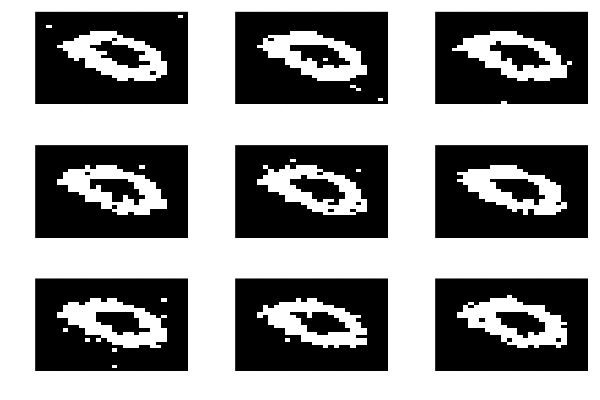

In [8]:
hms = [heatmap(reshape(PCDoutput[i], (28,28)), color = [:black, :white], legend = false) for i in 1:9]
plot(hms..., layout = (3,3), colorbar = false, axis= false)

## Training by PT algorithm


In [9]:
weight = randInitRBMWeight(visibleSize, hiddenSize)
ptConfig = TrainingConfig(
    usePersistentChain=true,
    betas=[1.0, 0.75, 0.5, 0.25, 0.0],
    k=5,
    epochs=10000,
    learningRate=0.001
)
validateConfig(ptConfig)
trainRBM!(weight, X[1:10, :], cdConfig)
PToutput = RBMAdvanced.inferRBM(weight, 1, 100, 100)
0

Using PT


0

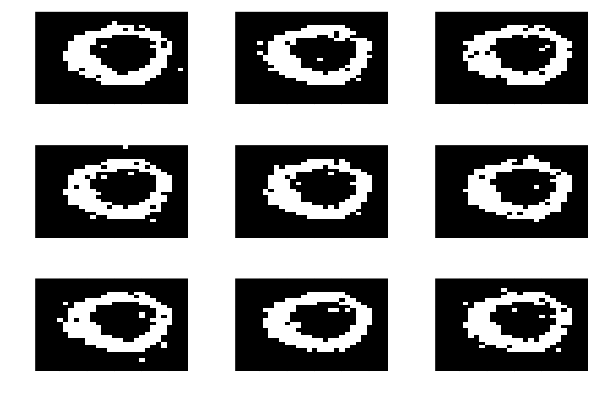

In [10]:
hms = [heatmap(reshape(PToutput[i], (28,28)), color = [:black, :white], legend = false) for i in 1:9]
plot(hms..., layout = (3,3), colorbar = false, axis= false)